<a href="https://colab.research.google.com/github/osama-kheshaifaty/SPE-KSA-WORKSHOP-2025/blob/main/ESP_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   Motor Temperature (C)  Motor Amps  Intake Pressure (psi)  \
0             104.944814   46.661964             115.426421   
1             174.085717   78.771085             111.744700   
2             147.839273  108.565125             276.563645   
3             131.839018   95.900240             112.386550   
4              78.722237  102.590503             117.987432   

   Vibration Intensity  ESP Failure  
0             1.041784            1  
1             1.215354            1  
2             0.450655            1  
3             0.974824            1  
4             0.900444            1  

Class distribution (0 = No Failure, 1 = Failure):
ESP Failure
1    845
0    155
Name: count, dtype: int64

Accuracy on test set: 0.81

Confusion Matrix:
[[ 10  28]
 [ 11 151]]

Classification Report:
              precision    recall  f1-score   support

  No Failure       0.48      0.26      0.34        38
     Failure       0.84      0.93      0.89       16

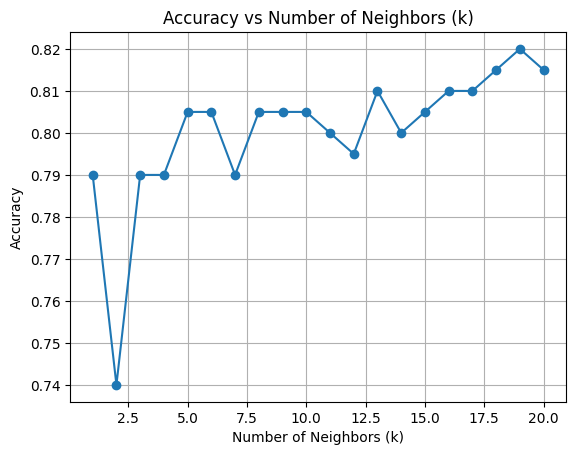

In [1]:
# Oil & Gas ML Example: Predicting ESP Failure using K-Nearest Neighbors (KNN)
# ----------------------------------------------------------------------------------------

# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 2: Generate Synthetic Dataset
# -----------------------------------
# We'll simulate operational ESP sensor data and predict early failure.

np.random.seed(42)  # For reproducibility

n_samples = 1000

# Generate synthetic operational sensor data
motor_temperature = np.random.uniform(60, 180, n_samples)     # Degrees Celsius
motor_amps = np.random.uniform(30, 120, n_samples)            # Amps
intake_pressure = np.random.uniform(50, 300, n_samples)       # psi
vibration = np.random.uniform(0.1, 1.5, n_samples)            # Arbitrary vibration unit

# Define a failure risk based on conditions
# Higher temperature, higher amps, higher vibration → higher failure risk
risk_score = (
    0.03 * (motor_temperature - 60) +
    0.05 * (motor_amps - 30) +
    0.2 * (vibration - 0.1) -
    0.01 * (intake_pressure - 50) +
    np.random.normal(0, 1, n_samples)  # random noise
)

# Higher risk score → more likely to fail
prob_failure = 1 / (1 + np.exp(-risk_score))

# Define target: 1 = Failure within 6 months, 0 = No Failure
failure = (np.random.rand(n_samples) < prob_failure).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Motor Temperature (C)': motor_temperature,
    'Motor Amps': motor_amps,
    'Intake Pressure (psi)': intake_pressure,
    'Vibration Intensity': vibration,
    'ESP Failure': failure
})

# Step 3: Explore the Data
print("First few rows of the dataset:")
print(df.head())

print("\nClass distribution (0 = No Failure, 1 = Failure):")
print(df['ESP Failure'].value_counts())

# Step 4: Feature and Target Split
X = df.drop('ESP Failure', axis=1)
y = df['ESP Failure']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
# Since KNN uses distances, we must scale features to similar ranges.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build and Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Step 8: Predictions and Evaluation
y_pred = knn_model.predict(X_test_scaled)

print(f"\nAccuracy on test set: {accuracy_score(y_test, y_pred):.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Failure", "Failure"]))

# Step 9: Explore Different k Values
k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.plot(k_range, accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
